In [1]:
# import packages
from src.models import train_model
import os
import librosa as lr
import pandas as pd

2022-11-30 14:27:49.991117: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_dir = '/Users/girishhanumantha/Documents/GitHub/audio_anomaly_detection/data/external/CleanSim'

In [3]:
# create features and append to a DataFrame
df_train = pd.DataFrame()
for audio_file in os.listdir(train_dir):
    print(audio_file)
    sr_ = 44100
    audio_ts, sr= lr.load(train_dir + '/' + audio_file, sr=sr_)
    df_temp = train_model.extract_features_autoencoder(audio_ts=audio_ts, sr=sr)
    df_temp['audio_file'] = audio_file
    df_temp['audio_idx'] = df_temp.index.values
    df_train = pd.concat([df_train, df_temp ], axis=0)

FOXSPORTS99_inf.wav
FOXSPORTS89_inf.wav
FOXSPORTS517_inf.wav
FOXSPORTS507_inf.wav
KEGL-FM507_inf.wav
KEGL-FM517_inf.wav
KEGL-FM197_inf.wav
FOXSPORTS399_inf.wav
KEGL-FM187_inf.wav
FOXSPORTS389_inf.wav
FOXSPORTS187_inf.wav
KEGL-FM389_inf.wav
FOXSPORTS197_inf.wav
KEGL-FM399_inf.wav
KDMX-FM487_inf.wav
KDMX-FM497_inf.wav
KDMX-FM209_inf.wav
KDMX-FM219_inf.wav
FOXSPORTS267_inf.wav
FOXSPORTS277_inf.wav
KEGL-FM277_inf.wav
KEGL-FM267_inf.wav
FOXSPORTS127_inf.wav
KEGL-FM329_inf.wav
FOXSPORTS137_inf.wav
KEGL-FM339_inf.wav
KDMX-FM69_inf.wav
KDMX-FM149_inf.wav
KDMX-FM79_inf.wav
KDMX-FM159_inf.wav
KDMX-FM357_inf.wav
KDMX-FM347_inf.wav
KEGL-FM137_inf.wav
FOXSPORTS339_inf.wav
KEGL-FM127_inf.wav
FOXSPORTS329_inf.wav
KEGL-FM79_inf.wav
KEGL-FM69_inf.wav
FOXSPORTS39_inf.wav
FOXSPORTS29_inf.wav
KEGL-FM459_inf.wav
KEGL-FM449_inf.wav
KDMX-FM427_inf.wav
KDMX-FM437_inf.wav
FOXSPORTS449_inf.wav
FOXSPORTS459_inf.wav
KDMX-FM287_inf.wav
KDMX-FM297_inf.wav
FOXSPORTS467_inf.wav
FOXSPORTS477_inf.wav
KDMX-FM409_inf.wav

In [4]:
#df_train.to_pickle('train_data.pkl')

In [5]:
df_train = pd.read_pickle('train_data.pkl')

In [6]:
id_cols = ['audio_file', 'audio_idx']
feature_cols = list(set(df_train.columns) - set(id_cols))

In [7]:
df_train

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_633,feature_634,feature_635,feature_636,feature_637,feature_638,feature_639,feature_640,audio_file,audio_idx
4,0.327078,0.384335,0.339443,0.842795,4.645612,22.110916,29.827007,6.260684,1.018023,2.007192,...,2.020920e-09,1.666783e-09,1.644386e-09,2.049729e-09,1.533129e-09,1.074889e-09,1.628949e-10,8.780408e-12,FOXSPORTS99_inf.wav,4
5,0.122468,0.124863,0.057693,0.322851,5.444322,65.595810,69.857185,2.998576,0.181803,0.590291,...,2.476521e-09,2.332397e-09,1.554772e-09,1.833447e-09,1.106505e-09,9.879851e-10,1.347133e-10,8.886353e-12,FOXSPORTS99_inf.wav,5
6,0.001431,0.001828,0.001973,0.103889,11.191648,99.829224,62.123962,0.151063,0.068014,0.077047,...,2.832289e-09,2.654956e-09,1.554957e-09,1.503331e-09,9.125420e-10,6.616438e-10,1.277419e-10,8.969373e-12,FOXSPORTS99_inf.wav,6
7,0.000904,0.002580,0.001171,0.021285,12.051988,108.581192,64.330063,0.184444,0.194675,0.238484,...,1.368641e-08,1.708652e-09,1.453376e-09,1.693826e-09,1.183740e-09,7.114555e-10,9.641018e-11,9.547394e-12,FOXSPORTS99_inf.wav,7
8,0.003236,0.011110,0.021731,0.057542,10.346906,109.439224,71.662994,0.242901,0.116133,0.168213,...,4.254539e-08,1.963286e-09,1.450099e-09,1.611055e-09,1.241624e-09,6.402365e-10,8.963253e-11,4.764719e-12,FOXSPORTS99_inf.wav,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,0.001937,0.096866,0.607264,1.302632,2.595107,20.091198,35.728054,20.225445,3.858782,2.203769,...,2.340837e-09,2.964650e-09,2.822403e-09,3.330585e-09,2.493766e-09,1.107566e-09,2.146643e-10,1.293068e-11,FOXSPORTS47_inf.wav,857
858,0.012181,0.601900,5.020729,6.949769,2.979489,20.034277,40.274826,13.546665,4.455758,4.199776,...,2.338514e-09,2.859966e-09,2.549299e-09,2.706321e-09,2.314980e-09,7.387141e-10,1.782017e-10,8.483107e-12,FOXSPORTS47_inf.wav,858
859,0.010600,0.847415,7.460706,12.265512,6.384730,39.735664,112.185890,24.082947,4.684467,3.919962,...,2.715194e-09,2.796980e-09,2.667513e-09,1.733745e-09,2.139334e-09,9.204558e-10,1.841027e-10,6.887750e-12,FOXSPORTS47_inf.wav,859
860,0.007163,0.897832,3.646344,3.157603,4.367939,21.475815,67.448288,23.553400,5.375798,4.543712,...,2.922356e-05,2.833357e-05,2.753982e-05,2.687784e-05,2.636836e-05,2.595281e-05,2.563623e-05,2.544156e-05,FOXSPORTS47_inf.wav,860


In [8]:
from sklearn.model_selection import train_test_split
VALIDATE_SIZE = 0.2
RANDOM_SEED = 42
# train // validate - no labels since they're all clean anyway
X_train, X_validate = train_test_split(df_train[feature_cols], test_size=VALIDATE_SIZE, random_state=RANDOM_SEED )

In [9]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.pipeline import Pipeline

# configure our pipeline
pipeline = Pipeline([('normalizer', Normalizer()),
                     ('scaler', MinMaxScaler())])

In [10]:
from sklearn.preprocessing import MinMaxScaler
pipeline.fit(X_train)
X_train_transformed = pd.DataFrame(pipeline.transform(X_train), columns=X_train.columns, index=X_train.index)
X_validate_transformed = pd.DataFrame(pipeline.transform(X_validate), columns=X_validate.columns, index=X_validate.index)

In [11]:
import tensorflow as tf

# setup nn architecture

# data dimensions // hyperparameters
input_dim = X_train_transformed.shape[1]
BATCH_SIZE = 256
EPOCHS = 100

# https://keras.io/layers/core/
autoencoder = tf.keras.models.Sequential([

    # deconstruct / encode
    tf.keras.layers.Dense(input_dim, activation='elu', input_shape=(input_dim,)),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(32, activation='elu'),

    # reconstruction / decode
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(input_dim, activation='elu')

])

# https://keras.io/api/models/model_training_apis/
autoencoder.compile(optimizer="adam",
                    loss="mse",
                    metrics=["acc"])

# print an overview of our model
autoencoder.summary();

2022-11-30 14:29:52.319577: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 640)               410240    
                                                                 
 dense_1 (Dense)             (None, 128)               82048     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 32)                4128      
                                                                 
 dense_6 (Dense)             (None, 128)               4

In [12]:
# Callbacks
from datetime import datetime

# current date and time
yyyymmddHHMM = datetime.now().strftime('%Y%m%d%H%M')

# new folder for a new run
log_subdir = f'{yyyymmddHHMM}_batch{BATCH_SIZE}_layers{len(autoencoder.layers)}'

# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode='min',
    restore_best_weights=True
)

save_model = tf.keras.callbacks.ModelCheckpoint(
    filepath='autoencoder_best_weights.hdf5',
    save_best_only=True,
    monitor='val_loss',
    verbose=0,
    mode='min'
)

tensorboard = tf.keras.callbacks.TensorBoard(
    f'logs/{log_subdir}',
    batch_size=BATCH_SIZE,
    update_freq='batch'
)

# callbacks argument only takes a list
cb = [early_stop, save_model, tensorboard]

In [13]:
# train model
history = autoencoder.fit(
    X_train_transformed, X_train_transformed,
    shuffle=True,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=cb,
    validation_data=(X_validate_transformed, X_validate_transformed)
);

Epoch 1/100
869/869 [==============================] - 9s 10ms/step - loss: 7.1591e-04 - acc: 0.4790 - val_loss: 5.5428e-04 - val_acc: 0.5378
Epoch 2/100
869/869 [==============================] - 9s 10ms/step - loss: 5.1052e-04 - acc: 0.5484 - val_loss: 4.5656e-04 - val_acc: 0.5751
Epoch 3/100
869/869 [==============================] - 10s 11ms/step - loss: 4.2833e-04 - acc: 0.5946 - val_loss: 3.9379e-04 - val_acc: 0.6167
Epoch 4/100
869/869 [==============================] - 10s 12ms/step - loss: 3.8289e-04 - acc: 0.6265 - val_loss: 3.6355e-04 - val_acc: 0.6389
Epoch 5/100
869/869 [==============================] - 11s 12ms/step - loss: 3.5812e-04 - acc: 0.6446 - val_loss: 3.4289e-04 - val_acc: 0.6553
Epoch 6/100
869/869 [==============================] - 11s 12ms/step - loss: 3.3988e-04 - acc: 0.6569 - val_loss: 3.2793e-04 - val_acc: 0.6649
Epoch 7/100
869/869 [==============================] - 10s 11ms/step - loss: 3.2572e-04 - acc: 0.6718 - val_loss: 3.1652e-04 - val_acc: 0.6795
E

In [14]:
# load test data
test_dir = '/Users/girishhanumantha/Documents/GitHub/audio_anomaly_detection/data/external/SimNoise'

# create features and append to a DataFrame
df_test = pd.DataFrame()
for audio_file in os.listdir(test_dir):
    print(audio_file)
    sr_ = 44100
    audio_ts, sr= lr.load(test_dir + '/' + audio_file, sr=sr_)
    df_temp = train_model.extract_features_autoencoder(audio_ts=audio_ts, sr=sr)
    df_temp['audio_file'] = audio_file
    df_temp['audio_idx'] = df_temp.index.values
    df_test = pd.concat([df_test, df_temp ], axis=0)

KDMX-FM5_whitenoise.wav
KEGL-FM373_whitenoise.wav
FOXSPORTS383_whitenoise.wav
KDMX-FM445_whitenoise.wav
KEGL-FM265_whitenoise.wav
FOXSPORTS295_whitenoise.wav
FOXSPORTS23_whitenoise.wav
FOXSPORTS145_whitenoise.wav
KDMX-FM25_whitenoise.wav
FOXSPORTS423_whitenoise.wav
KDMX-FM123_whitenoise.wav
KEGL-FM15_whitenoise.wav
FOXSPORTS535_whitenoise.wav
KDMX-FM363_whitenoise.wav
KEGL-FM455_whitenoise.wav
KDMX-FM275_whitenoise.wav
FOXSPORTS5_whitenoise.wav
KEGL-FM93_whitenoise.wav
FOXSPORTS305_whitenoise.wav
FOXSPORTS213_whitenoise.wav
KEGL-FM133_whitenoise.wav
KEGL-FM3_whitenoise.wav
KEGL-FM63_whitenoise.wav
KDMX-FM155_whitenoise.wav
KDMX-FM285_whitenoise.wav
FOXSPORTS455_whitenoise.wav
KDMX-FM393_whitenoise.wav
KDMX-FM53_whitenoise.wav
FOXSPORTS133_whitenoise.wav
KDMX-FM525_whitenoise.wav
FOXSPORTS55_whitenoise.wav
KEGL-FM213_whitenoise.wav
KDMX-FM433_whitenoise.wav
KEGL-FM305_whitenoise.wav
KEGL-FM145_whitenoise.wav
FOXSPORTS265_whitenoise.wav
KEGL-FM295_whitenoise.wav
FOXSPORTS373_whitenoise.w

In [15]:
df_test.to_pickle('test_data.pkl')

In [16]:
#df_test = pd.read_pickle('test_data.pkl')

In [17]:
X_test = df_test[feature_cols]
X_test_transformed = pd.DataFrame(pipeline.transform(X_test), columns=X_test.columns, index=X_test.index)

In [18]:
reconstruct_train = autoencoder.predict(X_train_transformed)
reconstruct_test = autoencoder.predict(X_test_transformed)

8688/8688 [==============================] - 20s 2ms/step


In [19]:
import numpy as np
mse_train = np.mean(np.power(X_train_transformed - reconstruct_train, 2), axis=1)
mse_test = np.mean(np.power(X_test_transformed - reconstruct_test, 2), axis=1)

In [20]:
mse_scaler = MinMaxScaler()
mse_train_transformed = pd.DataFrame(mse_scaler.fit_transform(pd.DataFrame(mse_train)), index=mse_train.index, columns=['MSE'])
mse_train_transformed['flag'] =0
mse_test_transformed = pd.DataFrame(mse_scaler.transform(pd.DataFrame(mse_test)), index = mse_test.index, columns=['MSE'])
mse_test_transformed['flag'] = 1

In [21]:
mse_merged = pd.concat([mse_train_transformed, mse_test_transformed])
mse_merged.sort_values(by=['MSE'], inplace=True)
mse_merged.reset_index(inplace=True)

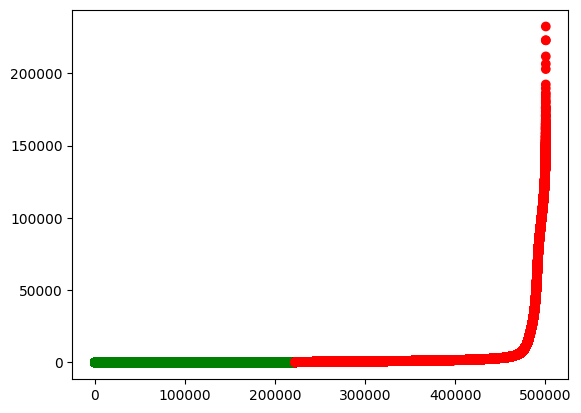

In [25]:
import matplotlib.pyplot as plt
plt.scatter(mse_merged.index, mse_merged['MSE'], c=mse_merged['flag'].apply(lambda x: 'green' if x==0 else 'red'))

<AxesSubplot:ylabel='Frequency'>

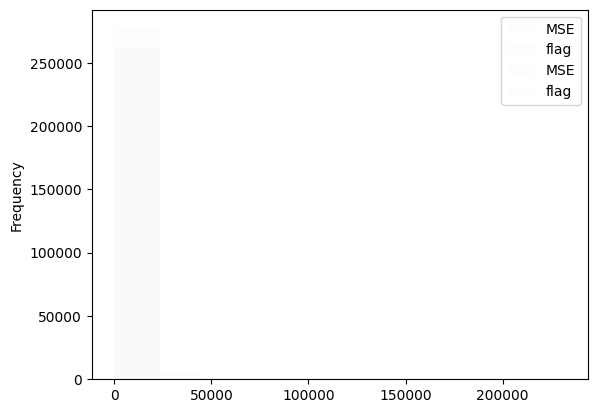

In [23]:
import matplotlib.pyplot as plt
ax = plt.gca()
mse_train_transformed.plot(kind='hist',ax=ax, bins=10, alpha=0.01)
mse_test_transformed.plot(kind='hist', ax=ax,bins=10, alpha=0.01)

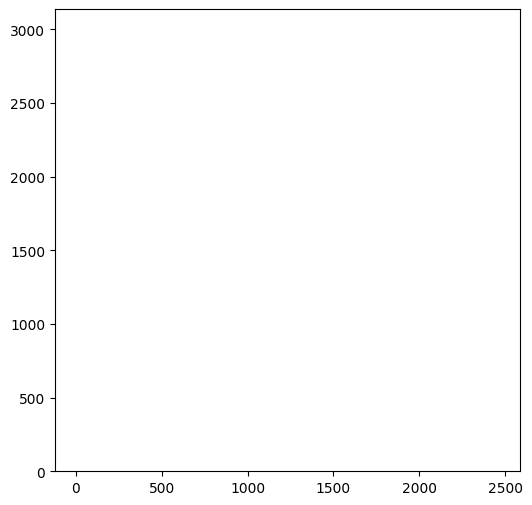

In [24]:

fig, ax = plt.subplots(figsize=(6,6))
ax.hist(mse_train, bins=50, density=True, label="train", alpha=.6, color="green")
ax.hist(mse_test, bins=50, density=True, label="test", alpha=.6, color="red")
plt.show()